In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from soslib import funcs
from metpy.units import units
import metpy.calc as calc
import pandas as pd

nctoolkit is using Climate Data Operators version 2.1.0


pyproj unable to set database path.


In [32]:
bb_climatology = pd.read_csv('../data/billy_barr_monthly_avg.csv',sep='\t')
bb_climatology[bb_climatology==" "] = np.nan
bb_climatology['WY'] = [int(str(year)[0:2]+str(year)[4:]) for year in bb_climatology['Year']]

bb_snowfall = pd.read_csv('../data/billy_barr_snowfall.csv', sep='\s+')


In [34]:
wy2020_wrf_ds = xr.open_mfdataset('../../../../../storage/dlhogan/sos/data/WY2020/*.nc')

In [74]:
wy2020_wrf_ds

<xarray.Dataset>
Dimensions:      (XTIME: 8784, south_north: 74, west_east: 85)
Coordinates:
    XLAT         (south_north, west_east) float32 dask.array<chunksize=(74, 85), meta=np.ndarray>
    XLONG        (south_north, west_east) float32 dask.array<chunksize=(74, 85), meta=np.ndarray>
  * XTIME        (XTIME) datetime64[ns] 2019-10-01 ... 2020-09-30T23:00:00
Dimensions without coordinates: south_north, west_east
Data variables: (12/14)
    ACCPRCP      (XTIME, south_north, west_east) float64 dask.array<chunksize=(744, 74, 85), meta=np.ndarray>
    EAST_MASK    (XTIME, south_north, west_east) float32 dask.array<chunksize=(744, 74, 85), meta=np.ndarray>
    GLW          (XTIME, south_north, west_east) float32 dask.array<chunksize=(744, 74, 85), meta=np.ndarray>
    HFX          (XTIME, south_north, west_east) float32 dask.array<chunksize=(744, 74, 85), meta=np.ndarray>
    HR_PRCP      (XTIME, south_north, west_east) float64 dask.array<chunksize=(744, 74, 85), meta=np.ndarray>
    LH           (XTIME, south_north, west_east) float32 dask.array<chunksize=(744, 74, 85), meta=np.ndarray>
    ...           ...
    SWDOWN       (XTIME, south_north, west_east) float32 dask.array<chunksize=(744, 74, 85), meta=np.ndarray>
    SWNORM       (XTIME, south_north, west_east) float32 dask.array<chunksize=(744, 74, 85), meta=np.ndarray>
    T2           (XTIME, south_north, west_east) float32 dask.array<chunksize=(744, 74, 85), meta=np.ndarray>
    TAYLOR_MASK  (XTIME, south_north, west_east) float32 dask.array<chunksize=(744, 74, 85), meta=np.ndarray>
    U10          (XTIME, south_north, west_east) float32 dask.array<chunksize=(744, 74, 85), meta=np.ndarray>
    V10          (XTIME, south_north, west_east) float32 dask.array<chunksize=(744, 74, 85), meta=np.ndarray>
Attributes: (12/135)
    TITLE:                            OUTPUT FROM WRF V3.8.1 MODEL
    START_DATE:                      2019-10-01_00:00:00
    SIMULATION_START_DATE:           2019-09-01_00:00:00
    WEST-EAST_GRID_DIMENSION:        349
    SOUTH-NORTH_GRID_DIMENSION:      391
    BOTTOM-TOP_GRID_DIMENSION:       50
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    history:                         Thu Jan 20 11:54:24 2022: ncks -x -v RAI...
    NCO:                             netCDF Operators version 4.9.9 (Homepage...

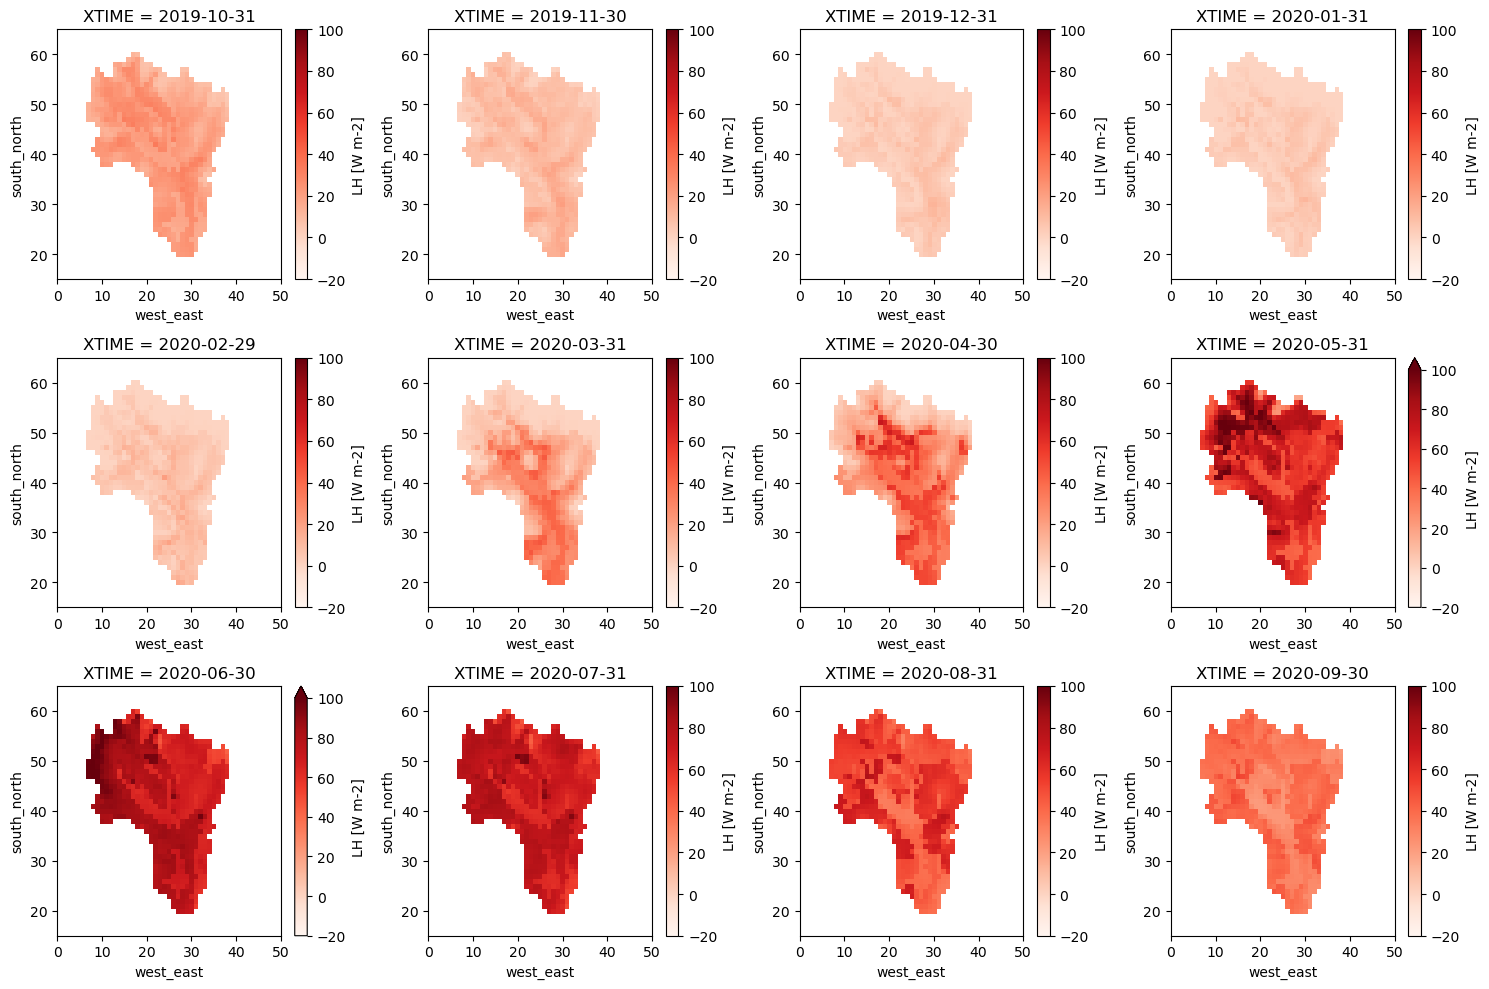

In [73]:
fig, axs = plt.subplots(3,4, figsize=(15,10), tight_layout=True)
axs = axs.ravel()
for i,ax in enumerate(axs):
    wy2020_wrf_ds.where(wy2020_wrf_ds.EAST_MASK==True).resample(XTIME='1M').mean().isel(XTIME=i).LH.compute().plot.imshow(ax=ax, cmap='Reds', vmin=-20, vmax=100)
    ax.set_xlim(0,50)
    ax.set_ylim(15,65)